In [1]:
!pip install rasterio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 34.9 MB/s eta 0:00:00


In [9]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import reshape_as_image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Lendo imagem como array
src = rio.open('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif')
img = reshape_as_image(src.read())

In [4]:
# Armazenando metadados
meta = src.profile

In [8]:
# Lendo classes
with rio.open('/content/drive/MyDrive/Curso PDI com Python/roi.tif') as src2:
  roi = src2.read(1)

In [10]:
# Criando conjunto de treino
X = img[roi > 0]
y  = roi[roi > 0]

In [11]:
# Dividindo conjunto em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(),
                                                    test_size = 0.3)

In [12]:
# Criando um objeto para o RF
rf =RandomForestRegressor(random_state=42)

# Rodando o modelo nos dados de treino
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Realizando predição e extraindo métricas
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}, R2: {r2}')

Mean Squared Error: 0.04891774891774892, R2: 0.981703932151118


In [16]:
# Criando matriz com bandas em colunas
img2d = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

# Rodando predição em toda imagem
pred_rf = rf.predict(img2d)

# Retornando para o formato original
pred_rf_final = pred_rf.reshape(img[:,:,0].shape)

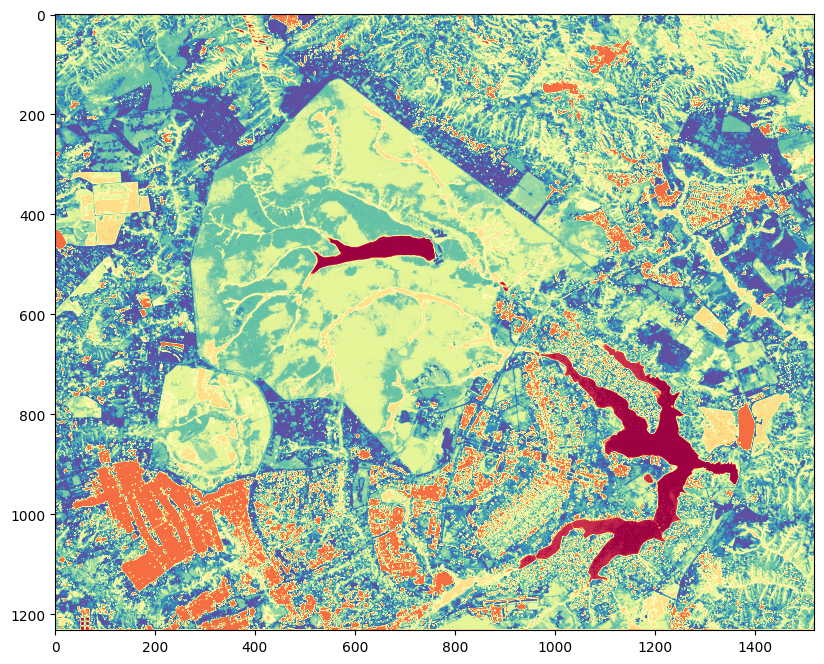

In [17]:
# Visualizando
plt.figure(figsize=(12,8))
plt.imshow(pred_rf_final, cmap='Spectral')